# Att göra

#### Inlämningsuppgift Betygskriterier 1,4,5,6,9,10,12, VG1-3

- 1. Grundläggande statistik och kvantitativa statistiska mått. Done?
- 4. Estimering och skattning.
- 5. De delar av paketen NumPy, SciPy och Statsmodels som kan appliceras på övriga kunskapsmål
- 6. Beräkna informativa statistiska mått, så som kovarians, korrelation och väntevärde
- 9. Utföra hypotestestning och beräkna konfidensintervall
- 10. Självständigt samla in data, utföra statistiska beräkningar och identifiera felkällor
- 12. Svara på statistiska frågeställningar genom nyttjande av paketen NumPy, SciPy och Statsmodels

##### VG 1-3
1. Med säkerhet redogöra för regressionsanalys
2. Med säkerhet presentera och visualisera statistisk data
3. Med säkerhet redogöra för statistisk inferens


##### Uppgiftsbeskrivelseexemplen:
- Deskriptiva mått som medelvärde, median och standardavvikelse
- Konfidensintervall
- Hypotestest
- Korrelationsanalys
- Linjär regression

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as scs 
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px
from statsmodels.formula.api import ols

C:\Users\isaka\AppData\Local\Temp\ipykernel_2676\2818101472.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Det givna datasettet. https://www.kaggle.com/datasets/shivam2503/diamonds
diamonds = pd.read_csv('diamonds.csv')

# Tar bort de diamanter som har 0mm i x, y eller z och där med ingen volym.
diamonds = diamonds[diamonds['x'] > 0]
diamonds = diamonds[diamonds['y'] > 0]
diamonds = diamonds[diamonds['z'] > 0]

# Och tar bort de värsta outliers som det inte heller verkar som att det finns någon förklaring till i dokumentationen.
diamonds = diamonds[diamonds['x'] < 12]
diamonds = diamonds[diamonds['y'] < 12]
diamonds = diamonds[diamonds['z'] < 12]

# Lägger till en kolumn för volym
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']

# Skapar en kolumn för rankning av 'cut', 'color' och 'clarity' då de är kategoriska variabler.
diamonds['cut_rank'] = diamonds['cut']
diamonds['cut_rank'].replace({'Fair': 5, 'Good': 4, 'Very Good': 3, 'Premium': 2, 'Ideal': 1}, inplace=True)

diamonds['color_rank'] = diamonds['color']
diamonds['color_rank'].replace({'J': 7, 'I': 6, 'H': 5, 'G': 4, 'F': 3, 'E': 2, 'D': 1}, inplace=True)

diamonds['clarity_rank'] = diamonds['clarity']
diamonds['clarity_rank'].replace({'I1': 8, 'SI2': 7, 'SI1': 6, 'VS2': 5, 'VS1': 4, 'VVS2': 3, 'VVS1': 2, 'IF': 1}, inplace=True)

# Funktionen .replace() verkar vara på väg att avvecklas, men gör jobbet för nu.

C:\Users\isaka\AppData\Local\Temp\ipykernel_2676\915741636.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diamonds['cut_rank'].replace({'Fair': 5, 'Good': 4, 'Very Good': 3, 'Premium': 2, 'Ideal': 1}, inplace=True)
C:\Users\isaka\AppData\Local\Temp\ipykernel_2676\915741636.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.

In [4]:
diamonds_sample = diamonds.sample(10000)

In [5]:
best_colors = diamonds['color'].value_counts(normalize=True).loc[['D', 'E', 'F']].sum()
print(f"Sannolikheten att helt slumpmässigt plocka upp en diamant med någon av de tre bästa färgerna är {best_colors*100:.2f}%.")

# Kontrollräkning för att se till att procentsatsen stämmer.
worst_colors = diamonds['color'].value_counts(normalize=True).loc[['G', 'H', 'I', 'J']].sum()
print("All data är medräknad.") if worst_colors + best_colors == 1 else print("Error: 100% != 100%")

Sannolikheten att helt slumpmässigt plocka upp en diamant med någon av de tre bästa färgerna är 48.42%.
All data är medräknad.


In [6]:
carat = diamonds['carat']

carat_mean = carat.mean()
carat_median = carat.median()
carat_skew = carat.skew()

print(f"Medelvikten bland diamanterna är {carat_mean:.4f} karat, och medianvikten är {carat_median:.4f} karat, med en snedhet på {carat_skew:.4f}, (alltså sned åt {"höger" if carat_skew > 0 else "vänster"}).")

Medelvikten bland diamanterna är 0.7977 karat, och medianvikten är 0.7000 karat, med en snedhet på 1.1162, (alltså sned åt höger).


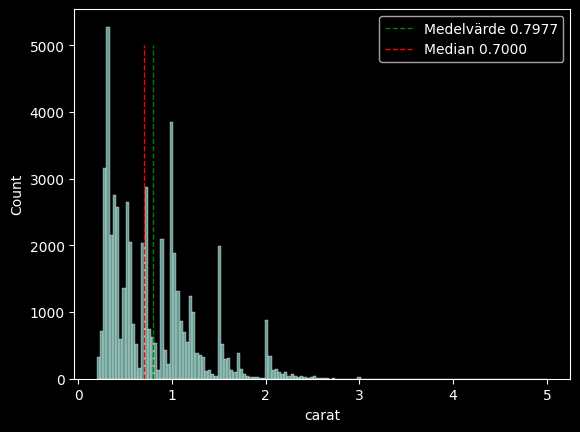

In [7]:
fig, ax = plt.subplots()
sns.histplot(carat)

plt.plot([carat_mean, carat_mean], [0, 5000], color='green', linestyle='--', linewidth=1, label=f'Medelvärde {carat_mean:.4f}')
plt.plot([carat_median, carat_median], [0, 5000], color='red', linestyle='--', linewidth=1, label=f'Median {carat_median:.4f}')

legend = plt.legend(loc='upper right')
plt.show()

## Centrala gränsvärdessatsen

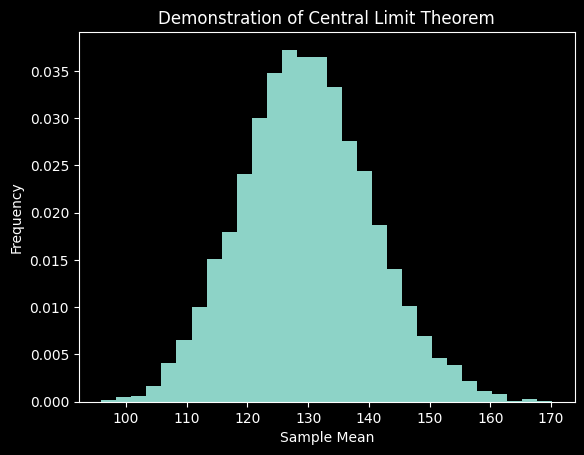

In [8]:
# Number of samples and sample size
num_samples = 10000
sample_size = 50

# Draw samples and calculate means
sample_means = [np.random.choice(diamonds['volume'], sample_size).mean() for _ in range(num_samples)]

# Plot distribution of sample means
plt.hist(sample_means, bins=30, density=True)
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Demonstration of Central Limit Theorem')
plt.show()

## Konfidensintervall

Vad är 

In [14]:


# Assuming df is your DataFrame and 'column' is the column of interest
data = diamonds['volume']

# Calculate mean and standard error
mean = np.mean(data)
sem = scs.sem(data)

# Calculate the 95% confidence interval
confidence = 0.95
ci = scs.t.interval(confidence, len(data)-1, loc=mean, scale=sem)

print(f"The 95% confidence interval for the mean is {ci}")

The 95% confidence interval for the mean is (129.15714054168578, 130.44777861639048)


## Hypotestest

H_A osv

### Kovarians

In [16]:
covariance = diamonds[['volume', 'carat']].cov()

print(covariance)

             volume      carat
volume  5844.656511  36.182065
carat     36.182065   0.224465


In [ ]:

# # t-test (assuming 'group' is a binary categorical variable)
# group1 = diamonds[diamonds['group'] == 0]['volume']
# group2 = diamonds[diamonds['group'] == 1]['volume']
# t_stat, p_val = scs.ttest_ind(group1, group2)


# from sklearn.linear_model import LinearRegression
# X = diamonds[['independent_var']]
# y = diamonds['dependent_var']
# model = LinearRegression().fit(X, y)

## Korrelationsanalys

<Axes: >

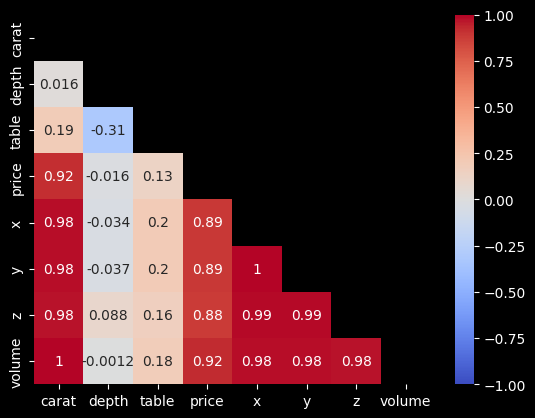

In [9]:
corr = diamonds_sample[['carat','depth','table','price','x','y','z','volume']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, cmap='coolwarm')

### Interaktiv korrelationsgraf

Klicka bort "cut" i legenden för att se specifika korrelationer.

In [10]:
fig = px.scatter(diamonds_sample,
        x='volume',
        y='price',
        color='cut',
        log_x=True,
        trendline='ols',
        title='Price vs Volume',
        labels={'volume':'Volume', 
                'price':'Price (USD)', 
                'clarity':'Clarity',
                'cut':'Cut',
                'color':'Color',
                'carat':'Carat',
                'depth':'Depth',},
        template='plotly_dark',
        hover_data=['carat', 
                'cut', 
                'color', 
                'depth', 
                'table', 
                'x', 'y', 'z',
                'cut_rank',
                'color_rank',
                'clarity_rank'],
        marginal_x='histogram',
        marginal_y='violin',
        )

fig.update_layout(autosize=False, width=1500, height=800, legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.80))

c:\Users\isaka\.virtualenvs\StatMetAi23-Isak-Andersson-e2nV03pU\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])
